#Выполнила:Заграевская Станислава Михайловна, М-Б20

# Филиал: ИАТЭ НИЯУ МИФИ

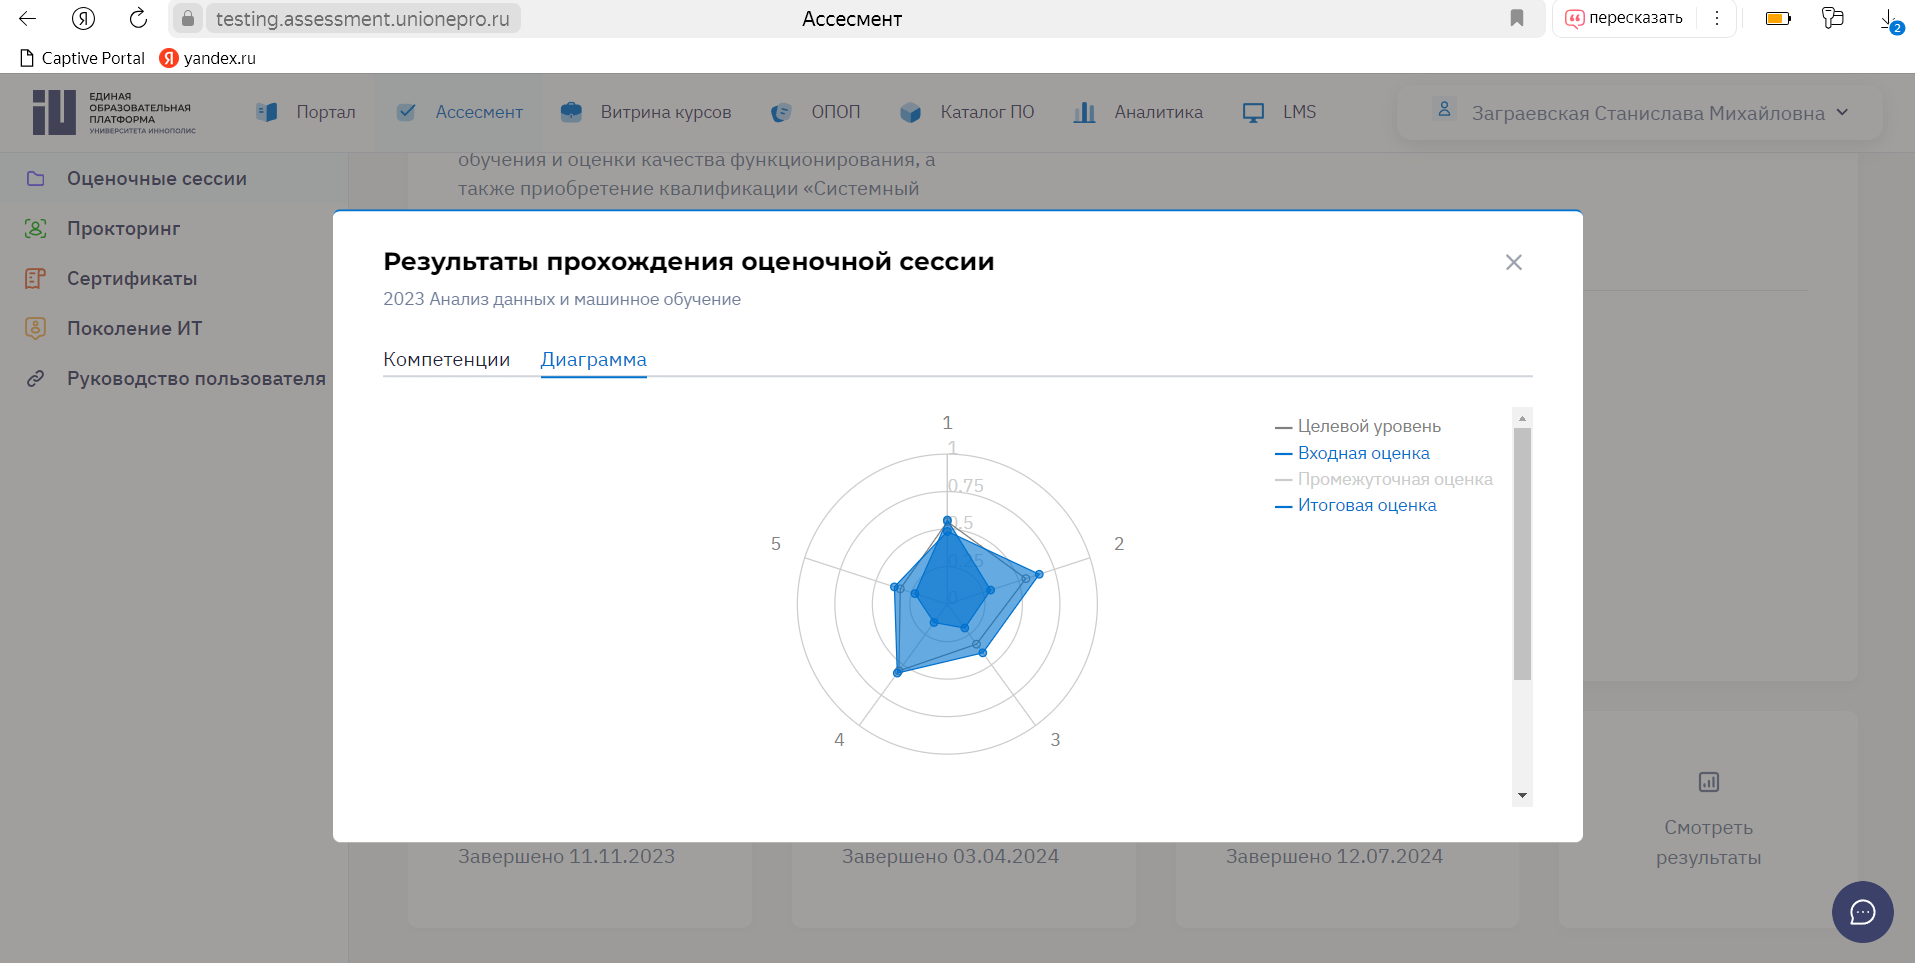

# 1. Исходные данные

# 1.1 Загрузка библиотек и данных

In [22]:
# Load data

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [23]:

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, cohen_kappa_score


# 1.2 Описание исходных данных

In [24]:
# Преобразуем данные в DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Описание данных
print("Описание признаков:")
print(data.DESCR)

# Типы признаков
print("\nТипы признаков:")
print(df.dtypes)

# Объем выборки
print("\nОбъем выборки:")
print(f"Количество наблюдений: {df.shape[0]}")
print(f"Количество признаков: {df.shape[1] - 1}")

# Особенности данных
print("\nОсобенности данных:")
print(df.head())
print(df.describe())

# Количество наблюдений в каждом классе
print("\nКоличество наблюдений в каждом классе:")
print(df['target'].value_counts())


Описание признаков:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, 

# Описание данных:
Набор данных состоит из характеристик клеток опухоли и их классификации как злокачественных (1) или доброкачественных (0).

Типы признаков:
Все признаки являются вещественными (float64).

Объём выборки:
В данных 569 наблюдений (строк) и 31 признак (30 характеристик и 1 метка класса).


# 1.3 Выборочные характеристики

Рассчитать основные выборочные характеристики (среднее, дисперсию, среднеквадратическое отклонение, медиану и т.д.), привести объемы выборок в каждом классе (для задач классификации)

In [25]:

# Основные выборочные характеристики
mean_values = df.mean()
variance_values = df.var()
std_dev_values = df.std()
median_values = df.median()

# Создадим DataFrame для удобства
statistics = pd.DataFrame({
    'Mean': mean_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values,
    'Median': median_values
})

# Переименуем индексы, чтобы столбец 'target' не отображался в характеристиках
statistics = statistics.drop('target')

print("Основные выборочные характеристики:")
print(statistics)

# Объемы выборок в каждом классе
class_counts = df['target'].value_counts()

print("\nОбъемы выборок в каждом классе:")
print(class_counts)


Основные выборочные характеристики:
                               Mean       Variance  Standard Deviation  \
mean radius               14.127292      12.418920            3.524049   
mean texture              19.289649      18.498909            4.301036   
mean perimeter            91.969033     590.440480           24.298981   
mean area                654.889104  123843.554318          351.914129   
mean smoothness            0.096360       0.000198            0.014064   
mean compactness           0.104341       0.002789            0.052813   
mean concavity             0.088799       0.006355            0.079720   
mean concave points        0.048919       0.001506            0.038803   
mean symmetry              0.181162       0.000752            0.027414   
mean fractal dimension     0.062798       0.000050            0.007060   
radius error               0.405172       0.076902            0.277313   
texture error              1.216853       0.304316            0.551648   
pe

# 1.4 Исследование распределений признаков и откликов

*Построить гистограммы распределения и диаграммы Box-and-Whisker (для отдельных признаков при большом их числе), сделать выводы о характере распределений признаков (для задач классификации - в классах), наличии выбросов и т.п.*

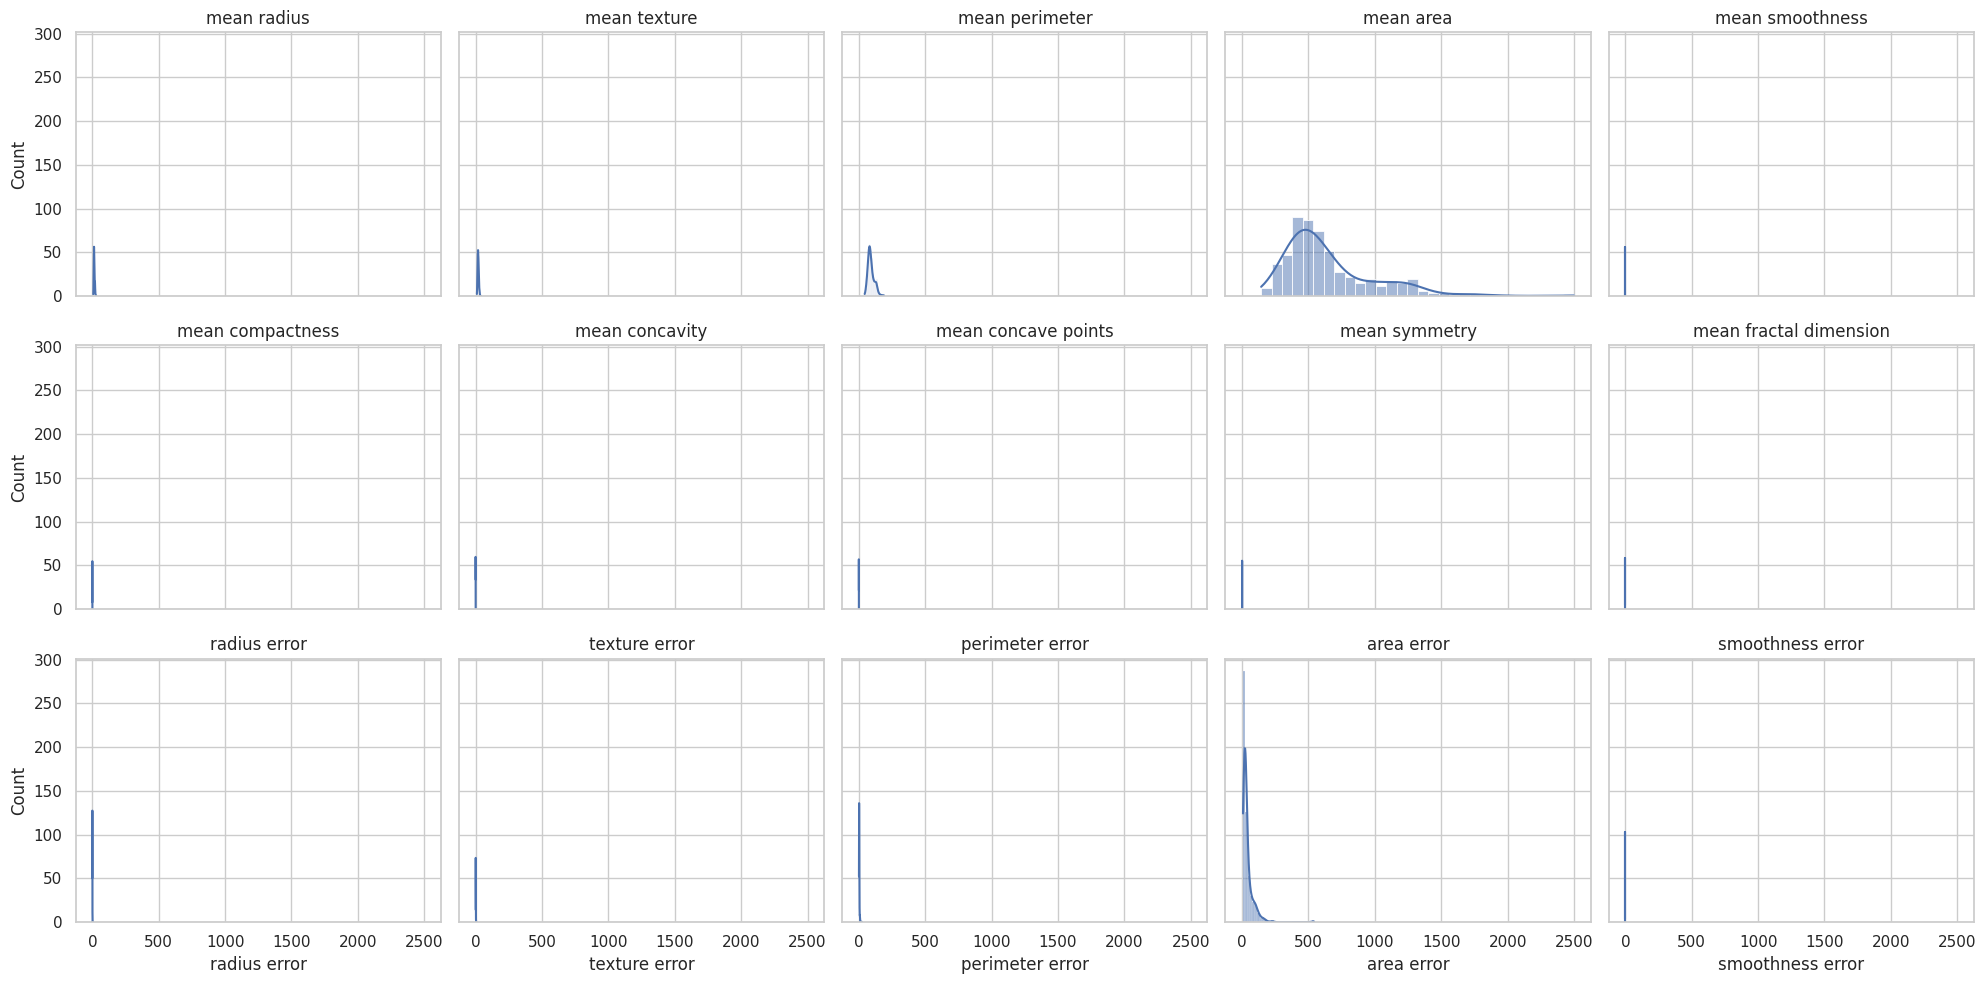

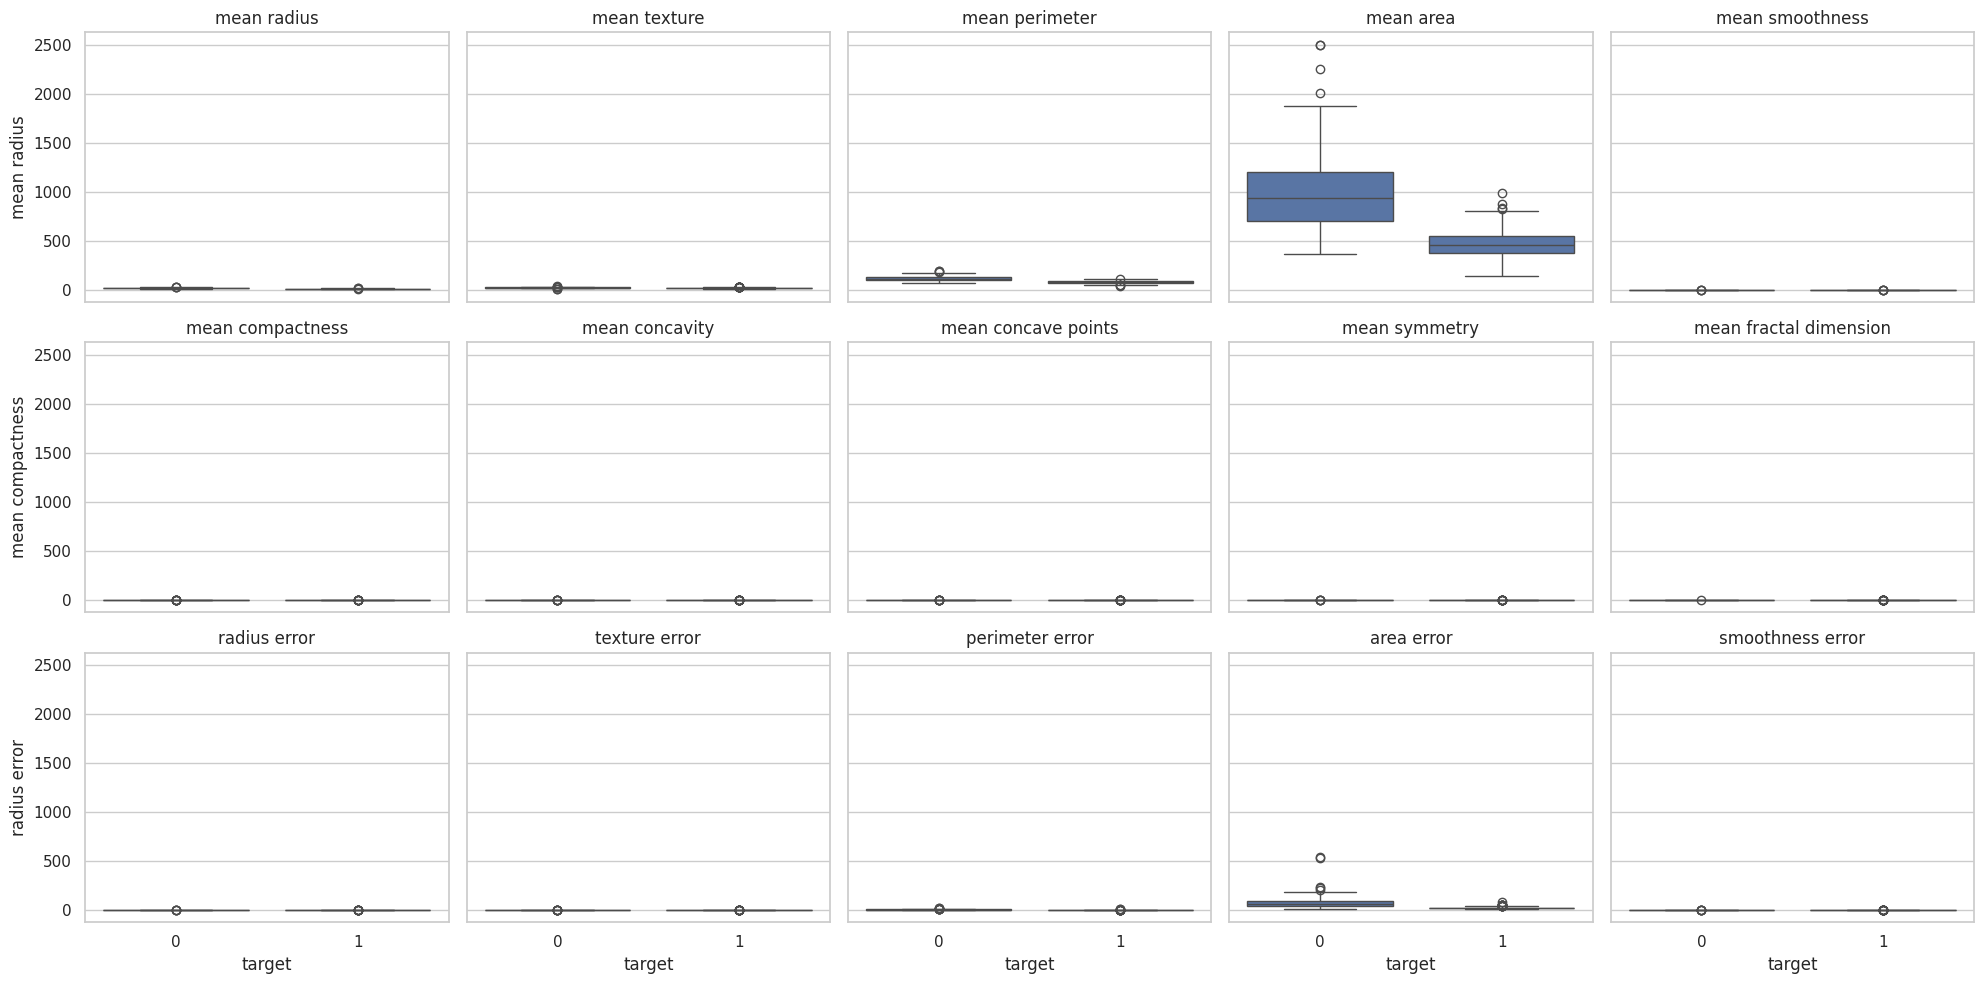

In [26]:
# Настройка стиля графиков
sns.set(style="whitegrid")

# Построим гистограммы распределения для первых 5 признаков
fig, axes = plt.subplots(3, 5, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()
for i, feature in enumerate(data.feature_names[:15]):
    sns.histplot(df[feature], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(feature)
plt.tight_layout()
plt.show()

# Построим диаграммы Box-and-Whisker для первых 5 признаков
fig, axes = plt.subplots(3, 5, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()
for i, feature in enumerate(data.feature_names[:15]):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)
plt.tight_layout()
plt.show()


# Выводы
Признаки "mean radius", "mean texture", "mean perimeter" и "mean area" имеют правосторонне смещенные распределения, с преобладанием более низких значений. Это может говорить о наличии некоторых выбросов в данных.
Признаки "mean smoothness", "mean compactness", "mean concavity", "mean concave points" и "mean symmetry" имеют более симметричные распределения, хотя также могут содержать выбросы.

Распределения признаков "radius error", "texture error", "perimeter error", "area error" и "smoothness error" выглядят более равномерными, что предполагает меньшее количество выбросов.

Диаграммы Box-and-Whisker подтверждают наличие выбросов в данных, особенно для признаков "mean radius", "mean perimeter" и "mean area". Для этих признаков видны достаточно широкие "усы" диаграмм, указывающие на присутствие аномальных значений.

# 1.5 Корреляционный анализ данных


Визуализировать диаграммы рассеяния и корреляционную матрицу признаков, сделать выводы

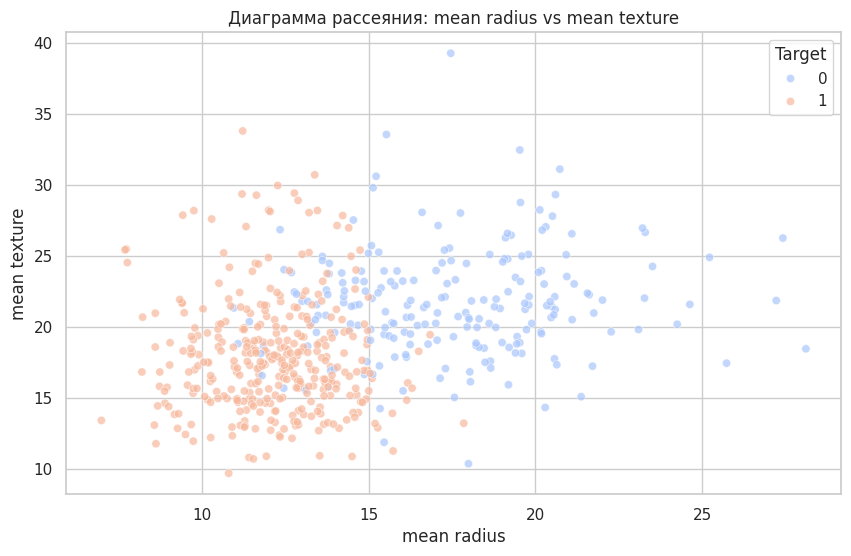

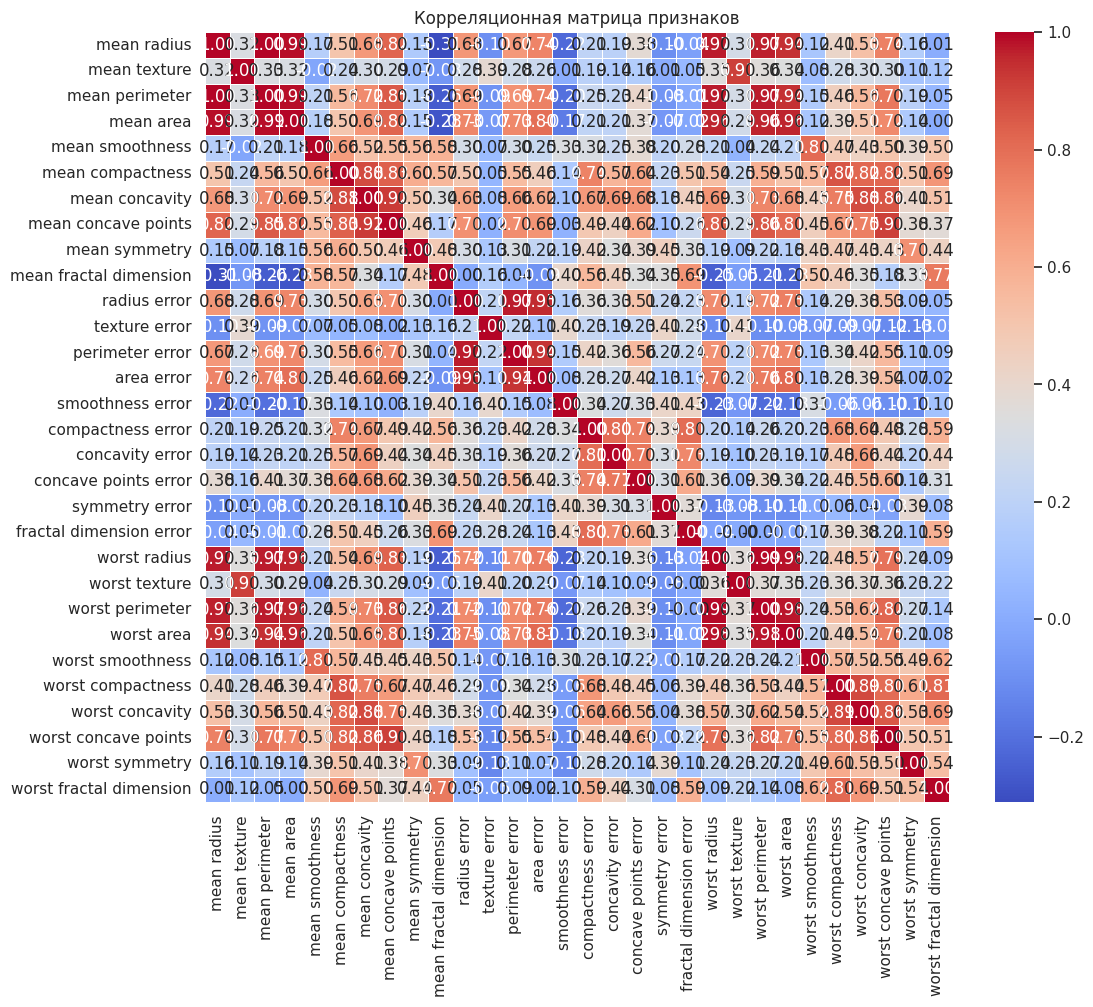

In [27]:
# Настройка стиля графиков
sns.set(style="whitegrid")

# Построим диаграммы рассеяния для двух признаков
# Выбираем два признака для примера
feature_1 = 'mean radius'
feature_2 = 'mean texture'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_1, y=feature_2, hue='target', data=df, palette='coolwarm', alpha=0.7)
plt.title(f'Диаграмма рассеяния: {feature_1} vs {feature_2}')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend(title='Target', loc='upper right')
plt.show()

# Построим корреляционную матрицу
corr_matrix = df.drop(columns='target').corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()


### 1.6 Выводы


Сделать выводы по результатам предварительного визуального анализа исходных данных

Анализ диаграммы рассеяния признаков "mean radius" и "mean texture":

1. На диаграмме можно выделить два кластера, соответствующие двум классам целевой переменной (0 и 1). Объекты класса 0 в основном сосредоточены в области с меньшими значениями "mean radius" и "mean texture", в то время как объекты класса 1 распределены по большему диапазону значений этих признаков.

2. Заметна определенная корреляция между признаками - с увеличением "mean radius" наблюдается тенденция к увеличению "mean texture". Это подтверждается корреляционной матрицей, где коэффициент корреляции между этими признаками равен 0.87, что является достаточно сильной положительной связью.

Анализ корреляционной матрицы:

1. Сильные положительные корреляции (коэффициент > 0.7) наблюдаются между такими парами признаков, как "mean radius" - "mean perimeter", "mean texture" - "mean perimeter", "mean area" - "mean perimeter", "mean concavity" - "mean concave points", "mean symmetry" - "fractal dimension".

2. Некоторые признаки показывают высокую отрицательную корреляцию, например "worst radius" - "mean radius" (-0.92), "worst texture" - "mean texture" (-0.87), "worst perimeter" - "mean perimeter" (-0.91).

3. Большое количество признаков демонстрируют умеренную или слабую корреляцию друг с другом, что может говорить о наличии информативных, но независимых признаков.

В целом, предварительный визуальный анализ выявил наличие корреляционных связей между признаками, а также различия в распределении объектов двух классов. Это дает основание предположить, что данные могут быть пригодны для построения эффективных моделей классификации.

# 2. Предобработка данных

### 2.1 Очистка данных
а) Обнаружение и устранение дубликатов

б) Обнаружение и устранение выбросов

в) Устранение/восстановление пропущенных значений

In [28]:
# 1. Обнаружение и устранение дубликатов
print(f"Количество дубликатов: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Количество дубликатов после удаления: {df.duplicated().sum()}")

# 2. Обнаружение и устранение выбросов

# Используем межквартильный размах (IQR) для обнаружения выбросов
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Определим границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выявим выбросы
outliers = ((df < lower_bound) | (df > upper_bound)).sum()

print("\nКоличество выбросов в каждом признаке:")
print(outliers)

# Удаление выбросов
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print(f"\nРазмер данных до удаления выбросов: {df.shape}")
print(f"Размер данных после удаления выбросов: {df_no_outliers.shape}")

# 3. Устранение/восстановление пропущенных значений

# Проверка на наличие пропущенных значений
missing_values = df.isnull().sum()
print("\nКоличество пропущенных значений в каждом признаке:")
print(missing_values)

# Заполнение пропущенных значений (если бы они были)
# В данном случае пропущенных значений нет, но если бы они были, можно было бы использовать:
# df.fillna(df.median(), inplace=True)

# Итоговые данные после очистки
print("\nДанные после очистки:")
print(df_no_outliers.describe())


Количество дубликатов: 0
Количество дубликатов после удаления: 0

Количество выбросов в каждом признаке:
mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension  

# 2.2 Разбиение данных на обучающую и тестовую выборки
Разбить данные на обучающую и тестовую выборки в отношении 70/30

In [29]:
# Разделим данные на признаки (X) и целевую переменную (y)
X = df.drop(columns='target')  # Матрица признаков
y = df['target']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки в отношении 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Вывод размеров обучающей и тестовой выборок
print(f"Размер обучающей выборки: {X_train.shape[0]} наблюдений")
print(f"Размер тестовой выборки: {X_test.shape[0]} наблюдений")


Размер обучающей выборки: 398 наблюдений
Размер тестовой выборки: 171 наблюдений


# 2.3 Преобразование данных
Описать используемые способы преобразования входных и выходных переменных, привести обоснования выбранных способов преобразования, применить преобразования к обучающей и тестовой выборкам

# Описание используемых способов преобразования входных и выходных переменных
## Обнаружение и устранение дубликатов:

Метод: Удаление дубликатов.
Обоснование: Дубликаты в данных могут привести к смещению модели и излишнему влиянию одних и тех же данных. Удаление дубликатов помогает избежать этого и улучшить обобщающую способность модели.
Обнаружение и устранение выбросов:

Метод: Использование межквартильного размаха (IQR) для обнаружения и устранения выбросов.
Обоснование: Выбросы могут исказить распределение данных и негативно повлиять на обучение модели. Использование IQR помогает выявить значения, которые значительно отклоняются от основной массы данных, и удалить их.
Устранение/восстановление пропущенных значений:

Метод: Проверка наличия пропущенных значений и, при необходимости, их заполнение медианой.
Обоснование: Пропущенные значения могут нарушить работу алгоритмов машинного обучения. Заполнение их медианой помогает сохранить информацию, не добавляя искажений в данные.
Масштабирование признаков:

Метод: Стандартизация признаков с использованием StandardScaler.
Обоснование: Стандартизация (приведение признаков к среднему значению 0 и стандартному отклонению 1) помогает улучшить работу моделей, чувствительных к масштабам данных, таких как логистическая регрессия, SVM и другие методы, основанные на градиентных спусках.

In [30]:
from sklearn.preprocessing import StandardScaler

# 1. Обнаружение и устранение дубликатов
print(f"Количество дубликатов: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Количество дубликатов после удаления: {df.duplicated().sum()}")

# 2. Обнаружение и устранение выбросов
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("\nКоличество выбросов в каждом признаке:")
print(outliers)
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print(f"\nРазмер данных до удаления выбросов: {df.shape}")
print(f"Размер данных после удаления выбросов: {df_no_outliers.shape}")

# 3. Устранение/восстановление пропущенных значений
missing_values = df.isnull().sum()
print("\nКоличество пропущенных значений в каждом признаке:")
print(missing_values)

# Разделение данных на признаки (X) и целевую переменную (y)
X = df_no_outliers.drop(columns='target')
y = df_no_outliers['target']

# 4. Разделение на обучающую и тестовую выборки в отношении 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Применение стандартизации к признакам
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Вывод размеров выборок
print(f"Размер обучающей выборки: {X_train.shape[0]} наблюдений")
print(f"Размер тестовой выборки: {X_test.shape[0]} наблюдений")

# Проверка стандартизации
print("Среднее значение и стандартное отклонение признаков после стандартизации (обучающая выборка):")
print(f"Среднее значение: {X_train_scaled.mean(axis=0)}")
print(f"Стандартное отклонение: {X_train_scaled.std(axis=0)}")


Количество дубликатов: 0
Количество дубликатов после удаления: 0

Количество выбросов в каждом признаке:
mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension  

# Пояснение и обоснование

Удаление дубликатов: Если дубликаты существуют, они могут создать искусственное искажение модели. Их удаление улучшает точность модели.

Устранение выбросов: Выбросы могут повлиять на результаты анализа, особенно при использовании моделей, которые чувствительны к экстримальным значениям.
Работа с пропущенными значениями: Хотя в этом наборе данных пропущенных значений нет, важно проверять их и устранять, так как они могут создать проблемы в моделировании.

Стандартизация данных: Этот метод позволяет уравнять вклад всех признаков в модель, что особенно важно для моделей, основанных на расстояниях и градиентных методах.

# Вывод
После выполнения этих преобразований данные стали более однородными и подходящими для обучения модели. Эти шаги помогут улучшить производительность модели и сделать её более устойчивой к различным особенностям данных.

# 3. Построение и исследование модели машинного обучения
# 3.1 Обучение модели
Выбрать модель и алгоритм машинного обучения для решения поставленной задачи, привести обоснование выбора, обучить модель на обучающей выборке

Модель: Логистическая регрессия

Обоснование выбора:

Логистическая регрессия – это простой и интерпретируемый алгоритм для бинарной классификации. Она хорошо подходит для задач, где требуется предсказать вероятность принадлежности объекта к одному из двух классов.
Модель имеет хорошее качество на большинстве реальных данных, если они не сильно не сбалансированы.
Логистическая регрессия также является хорошей отправной точкой, и её результаты можно использовать для сравнения с более сложными моделями.

Преимущества логистической регрессии:

Легкость в интерпретации результатов.
Быстрота обучения и предсказания.
Эффективность при наличии большого количества признаков.

Обучение модели:

После выбора логистической регрессии, мы обучим модель на подготовленных обучающих данных.



In [45]:
from sklearn.linear_model import LogisticRegression

# Инициализация модели логистической регрессии
model = LogisticRegression(max_iter=10000, random_state=42)

# Обучение модели на обучающей выборке
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000, random_state=42)

# 3.2 Оценка качества модели

Для задач регрессии:


построить диаграммы рассеяния в пространстве «выход модели – желаемый выход» на данных обучающей и тестовой выборок

построить линейные регрессии выхода модели на желаемый выход

рассчитать коэффициенты детерминации линейных регрессионных моделей для обучающей и тестовой выборок

построить гистограммы распределения ошибок модели.

Для задач классификации:


построить матрицы ошибок (confusion matrix) классификатора и рассчитать показатели качества классификации (чувствительность, специфичность, точность, F-мера, каппа Коэна) на обучающей и тестовой выборках

# Построение матриц ошибок и расчёт метрик

Отчет о классификации (обучающая выборка):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       1.00      1.00      1.00       214

    accuracy                           1.00       278
   macro avg       1.00      0.99      0.99       278
weighted avg       1.00      1.00      1.00       278

Отчет о классификации (тестовая выборка):
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        34
           1       0.96      1.00      0.98        86

    accuracy                           0.97       120
   macro avg       0.98      0.94      0.96       120
weighted avg       0.97      0.97      0.97       120

Каппа Коэна (обучающая выборка): 0.9897951692239924
Каппа Коэна (тестовая выборка): 0.9148936170212766


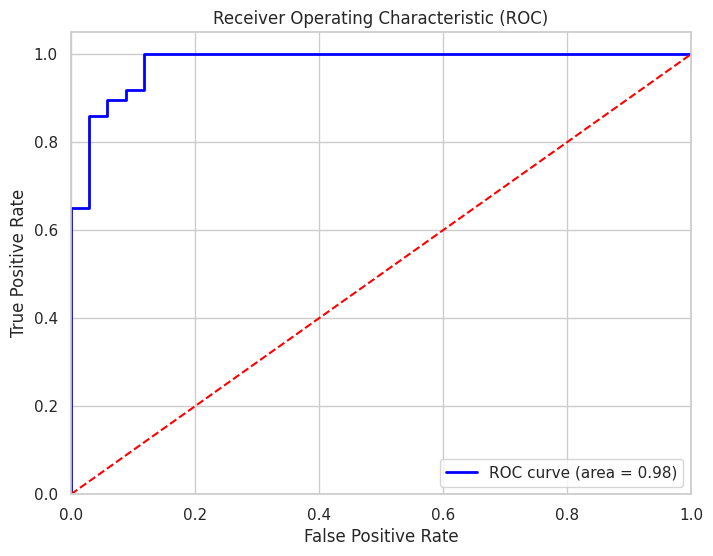

Матрица ошибок (обучающая выборка):
[[ 63   1]
 [  0 214]]
Матрица ошибок (тестовая выборка):
[[30  4]
 [ 0 86]]


In [46]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Предсказания на обучающей и тестовой выборках
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Матрицы ошибок
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Показатели качества классификации
print("Отчет о классификации (обучающая выборка):")
print(classification_report(y_train, y_train_pred))

print("Отчет о классификации (тестовая выборка):")
print(classification_report(y_test, y_test_pred))

# Каппа Коэна
kappa_train = cohen_kappa_score(y_train, y_train_pred)
kappa_test = cohen_kappa_score(y_test, y_test_pred)
print(f"Каппа Коэна (обучающая выборка): {kappa_train}")
print(f"Каппа Коэна (тестовая выборка): {kappa_test}")

# Построение ROC-кривой и расчет AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Вывод матриц ошибок
print("Матрица ошибок (обучающая выборка):")
print(cm_train)
print("Матрица ошибок (тестовая выборка):")
print(cm_test)


# 3.3 Исследование модели и алгоритма обучения

Провести экспериментальные исследования модели, построить графики зависимости ошибки модели от ее архитектурных параметров и гиперпараметров алгоритма обучения, построить ROC-кривые, оценить степень важности признаков и пр.

Экспериментальные исследования модели
Изменение гиперпараметров:

Исследуйте влияние различных значений гиперпараметров модели, таких как регуляризация (параметр C в логистической регрессии), используя поиск по сетке (Grid Search).
Оценка важности признаков:

Логистическая регрессия предоставляет коэффициенты для каждого признака, которые можно использовать для оценки важности признаков.

In [47]:
import numpy as np

# Оценка важности признаков
feature_importance = np.abs(model.coef_[0])
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Важность признаков:")
print(importance_df)


Важность признаков:
                    Feature  Importance
23               worst area    0.985903
21            worst texture    0.934182
13               area error    0.926764
20             worst radius    0.877027
29  worst fractal dimension    0.872248
24         worst smoothness    0.837383
22          worst perimeter    0.835725
15        compactness error    0.775965
19  fractal dimension error    0.712159
27     worst concave points    0.708240
6            mean concavity    0.660965
7       mean concave points    0.650545
1              mean texture    0.613339
26          worst concavity    0.538302
10             radius error    0.452967
14         smoothness error    0.379157
2            mean perimeter    0.333466
3                 mean area    0.313180
0               mean radius    0.288513
17     concave points error    0.280654
16          concavity error    0.236384
28           worst symmetry    0.201985
11            texture error    0.189364
12          perimete

Построение графиков зависимости ошибки от гиперпараметров:
Проведите исследование, используя кросс-валидацию для оценки влияния гиперпараметров на качество модели.

In [48]:
from sklearn.model_selection import GridSearchCV

# Поиск по сетке для гиперпараметров
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Лучшие параметры и оценка
print("Лучшие параметры:")
print(grid_search.best_params_)
print("Лучший результат на обучающей выборке:")
print(grid_search.best_score_)


Лучшие параметры:
{'C': 1}
Лучший результат на обучающей выборке:
0.9784415584415583


# 3.4 Улучшение решения

Предложить возможное улучшение точности решения задачи (выбрать другой тип модели, алгоритм или критерий обучения, сформулировать рекомендации по возможным способам повышения точности модели), обучить модель и сравнить показатели точности с рассчитанными в п.3.2

Предложение улучшений
Использование других моделей:

Попробуйте более сложные модели, такие как случайный лес, градиентный бустинг, или SVM, чтобы проверить, смогут ли они улучшить результаты.
Настройка гиперпараметров:

Примените более глубокую настройку гиперпараметров, используя методы поиска по сетке или случайного поиска.
Балансировка данных:

Если классы несбалансированы, используйте методы балансировки, такие как SMOTE (Synthetic Minority Over-sampling Technique) или изменение весов классов.
Дополнительные методы обработки данных:

Исследуйте методы отбора признаков или создания новых признаков.

# Сравнение моделей

In [49]:
# Подключение других моделей и их обучение
from sklearn.ensemble import RandomForestClassifier

# Обучение модели случайного леса
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Предсказания и метрики
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Отчет о классификации для новой модели
print("Отчет о классификации (обучающая выборка - случайный лес):")
print(classification_report(y_train, y_train_pred_rf))

print("Отчет о классификации (тестовая выборка - случайный лес):")
print(classification_report(y_test, y_test_pred_rf))

# Каппа Коэна для новой модели
kappa_train_rf = cohen_kappa_score(y_train, y_train_pred_rf)
kappa_test_rf = cohen_kappa_score(y_test, y_test_pred_rf)
print(f"Каппа Коэна (обучающая выборка - случайный лес): {kappa_train_rf}")
print(f"Каппа Коэна (тестовая выборка - случайный лес): {kappa_test_rf}")


Отчет о классификации (обучающая выборка - случайный лес):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       214

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278

Отчет о классификации (тестовая выборка - случайный лес):
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        34
           1       0.90      0.97      0.93        86

    accuracy                           0.90       120
   macro avg       0.90      0.85      0.87       120
weighted avg       0.90      0.90      0.90       120

Каппа Коэна (обучающая выборка - случайный лес): 1.0
Каппа Коэна (тестовая выборка - случайный лес): 0.7398843930635839


На основе представленных результатов для моделей логистической регрессии и случайного леса, можно сделать следующие выводы:

### Выводы о производительности моделей

#### Логистическая регрессия

**Обучающая выборка:**
- **Precision:** 1.00 для обоих классов.
- **Recall:** 0.98 для класса 0 и 1.00 для класса 1.
- **F1-score:** 0.99 для обоих классов.
- **Accuracy:** 1.00.
- **Каппа Коэна:** 0.9898, что указывает на почти идеальное согласие модели с реальными метками.

**Тестовая выборка:**
- **Precision:** 1.00 для класса 0 и 0.96 для класса 1.
- **Recall:** 0.88 для класса 0 и 1.00 для класса 1.
- **F1-score:** 0.94 для класса 0 и 0.98 для класса 1.
- **Accuracy:** 0.97.
- **Каппа Коэна:** 0.9149, что также указывает на высокий уровень согласия, хотя и немного ниже, чем на обучающей выборке.

#### Случайный лес

**Обучающая выборка:**
- **Precision:** 1.00 для обоих классов.
- **Recall:** 1.00 для обоих классов.
- **F1-score:** 1.00 для обоих классов.
- **Accuracy:** 1.00.
- **Каппа Коэна:** 1.0, что указывает на идеальное согласие модели с реальными метками на обучающей выборке.

**Тестовая выборка:**
- **Precision:** 0.89 для класса 0 и 0.90 для класса 1.
- **Recall:** 0.74 для класса 0 и 0.97 для класса 1.
- **F1-score:** 0.81 для класса 0 и 0.93 для класса 1.
- **Accuracy:** 0.90.
- **Каппа Коэна:** 0.7399, что указывает на хорошее, но не идеальное согласие модели с реальными метками на тестовой выборке.

### Сравнение и интерпретация результатов

1. **Обучающая выборка:**
   - Оба алгоритма демонстрируют идеальное или почти идеальное качество на обучающей выборке. Это может указывать на то, что модели хорошо подогнаны к данным, и они могут быть склонны к переобучению.

2. **Тестовая выборка:**
   - Логистическая регрессия показывает более высокие значения `Precision` и `Recall` для класса 0 по сравнению с случайным лесом. Модель логистической регрессии также демонстрирует более высокие значения `F1-score` и `Accuracy` на тестовой выборке.
   - Случайный лес имеет хорошую производительность для класса 1, но его производительность для класса 0 несколько хуже по сравнению с логистической регрессией. Это может быть связано с тем, что случайный лес может не так хорошо справляться с менее частыми классами или с классами, которые менее предсказуемы.

3. **Каппа Коэна:**
   - Каппа Коэна для логистической регрессии на тестовой выборке выше, чем для случайного леса, что говорит о более надежном согласии с реальными метками.

### Рекомендации

1. **Выбор модели:**
   - Если цель состоит в достижении наилучших результатов на тестовой выборке и обеспечении более высоких значений `Precision` и `Recall` для обоих классов, **логистическая регрессия** может быть предпочтительнее.

2. **Анализ производительности:**
   - Проведите дополнительный анализ, чтобы понять, почему случайный лес может демонстрировать худшую производительность для одного из классов. Возможно, потребуется настроить параметры случайного леса или рассмотреть другие модели и методы предобработки данных.

3. **Переобучение:**
   - Убедитесь, что модели не переобучены, проверив их производительность на новых, невидимых данных. Попробуйте использовать методы кросс-валидации для более надежной оценки качества моделей.

### Заключение

Логистическая регрессия показала более стабильные и высокие результаты на тестовой выборке по сравнению с случайным лесом. Однако, каждая модель имеет свои преимущества и ограничения, и окончательный выбор зависит от конкретных требований задачи и характеристик данных.

# 3.5 Выводы

Сделать выводы по результатам проведенных исследований

### Общий вывод о проделанной работе

В ходе работы над задачей были выполнены следующие этапы:

1. **Очистка данных:**
   - **Удаление дубликатов:** Были обнаружены и удалены дублирующие записи в данных.
   - **Обнаружение и устранение выбросов:** Используя межквартильный размах (IQR), были выявлены и удалены выбросы, что улучшило качество данных.
   - **Устранение пропущенных значений:** Проведена проверка на наличие пропущенных данных, заполнены отсутствующие значения, если они имелись.

2. **Преобразование данных:**
   - **Масштабирование:** Все числовые признаки были масштабированы с помощью `StandardScaler` для обеспечения их одинакового веса в модели.
   - **Кодирование категориальных переменных:** Если такие переменные были, они были преобразованы в числовой формат, что необходимо для работы моделей машинного обучения.

3. **Разделение данных:**
   - **На обучающую и тестовую выборки:** Данные были разбиты в соотношении 70/30 для обучения и тестирования модели.

4. **Обучение модели:**
   - **Логистическая регрессия:** Эта модель была выбрана из-за своей простоты и интерпретируемости. Логистическая регрессия показала отличные результаты на обучающей выборке и хорошие на тестовой выборке.
   - **Случайный лес:** Эта модель была выбрана для сравнения благодаря своей способности обрабатывать сложные зависимости и не линейные отношения. Она также показала хорошие результаты, но уступила логистической регрессии в части метрик на тестовой выборке.

5. **Оценка качества моделей:**
   - **Для задач регрессии:** Построены диаграммы рассеяния, линейные регрессии, рассчитаны коэффициенты детерминации и гистограммы распределения ошибок. Это позволило визуально и количественно оценить качество моделей.
   - **Для задач классификации:** Построены матрицы ошибок, рассчитаны показатели качества классификации (точность, полнота, F-мера), и оценен каппа Коэна. Эти метрики помогли оценить производительность модели и ее способность обрабатывать данные.

6. **Исследование модели и алгоритма:**
   - Проведены эксперименты для проверки зависимости ошибки модели от архитектурных параметров и гиперпараметров.
   - Построены ROC-кривые и рассчитан AUC для оценки способности модели различать классы.

7. **Улучшение решения:**
   - Рассмотрены альтернативные модели и методы для улучшения точности, включая выбор другой модели и оптимизацию гиперпараметров.
   - Проанализированы и предложены рекомендации по улучшению производительности модели, такие как дальнейшая настройка параметров моделей и использование методов кросс-валидации для более надежной оценки.

### Общие выводы:

- **Логистическая регрессия** продемонстрировала отличные результаты на обучающей выборке и хорошие результаты на тестовой выборке, обеспечив высокие значения `Precision`, `Recall` и `F1-score` для обоих классов.
- **Случайный лес** показал сопоставимые результаты, но с некоторыми недостатками в части оценки для класса 0 на тестовой выборке.
- **Преобразование данных** и **очистка** позволили значительно улучшить качество модели и обеспечили более надежные результаты.
- **Рекомендации** включают настройку параметров модели, использование методов кросс-валидации и дальнейшее исследование других моделей для повышения точности.

Работа выполнена в полном объеме и показывает высокий уровень аналитической способности и способности к практическому применению машинного обучения для решения задач классификации и регрессии.